In [1]:
%pip install numpy
%pip install scipy
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
from scipy.stats import norm, t, chi2, kstwobign
from scipy.stats import f as fisher
import matplotlib.pyplot as plt

In [5]:
a = 2
sigma = np.sqrt(0.5)
epsilon = 0.17

with open('data.txt') as file:
    normal_data_20 = np.array(list(map(np.float64, file.readline().replace(',','.').split())))
    normal_data_30 = np.array(list(map(np.float64, file.readline().replace(',','.').split())))
    uniform_data_30 = np.array(list(map(np.float64, file.readline().replace(',','.').split())))
normal_data_50 = np.array([*normal_data_20, *normal_data_30])

In [6]:
normal_data_20

array([2.699, 1.522, 2.414, 1.107, 1.296, 2.998, 1.335, 3.061, 2.072,
       2.368, 2.742, 2.603, 0.13 , 2.693, 3.268, 1.569, 0.675, 1.831,
       1.995, 1.797])

In [7]:
normal_data_30

array([1.563, 2.537, 1.982, 2.98 , 0.651, 1.749, 2.62 , 2.976, 2.225,
       1.61 , 1.763, 3.009, 1.387, 1.815, 1.25 , 0.936, 0.026, 2.057,
       1.386, 2.268, 1.353, 1.723, 1.866, 1.8  , 1.545, 2.039, 1.77 ,
       1.369, 2.693, 2.086])

In [8]:
uniform_data_30

array([0.867, 0.519, 0.886, 0.087, 0.392, 0.024, 0.964, 0.068, 0.325,
       0.21 , 0.426, 0.666, 0.998, 0.07 , 0.646, 0.609, 0.012, 0.201,
       0.308, 0.494, 0.07 , 0.39 , 0.486, 0.175, 0.566, 0.024, 0.904,
       0.965, 0.313, 0.132])

In [9]:
normal_data_50

array([2.699, 1.522, 2.414, 1.107, 1.296, 2.998, 1.335, 3.061, 2.072,
       2.368, 2.742, 2.603, 0.13 , 2.693, 3.268, 1.569, 0.675, 1.831,
       1.995, 1.797, 1.563, 2.537, 1.982, 2.98 , 0.651, 1.749, 2.62 ,
       2.976, 2.225, 1.61 , 1.763, 3.009, 1.387, 1.815, 1.25 , 0.936,
       0.026, 2.057, 1.386, 2.268, 1.353, 1.723, 1.866, 1.8  , 1.545,
       2.039, 1.77 , 1.369, 2.693, 2.086])

In [10]:
mean_norm_20 = np.mean(normal_data_20)
var_norm_20 = np.sqrt(np.var(normal_data_20))

mean_norm_30 = np.mean(normal_data_30)
var_norm_30 = np.sqrt(np.var(normal_data_30))

mean_uni_30 = np.mean(uniform_data_30)
var_uni_30 = np.sqrt(np.var(uniform_data_30))

mean_norm_50 = np.mean(normal_data_50)
var_norm_50 = np.sqrt(np.var(normal_data_50))

In [12]:
norm_quantile = norm.ppf(1 - epsilon / 2)
norm_quantile

1.3722038089987263

In [13]:
left_bound_1 = mean_norm_50 - norm_quantile * sigma / np.sqrt(normal_data_50.size) 
right_bound_1 = mean_norm_50 + norm_quantile * sigma / np.sqrt(normal_data_50.size) 

In [14]:
print(f'Доверительный интервал а: ({left_bound_1}, {right_bound_1})')

Доверительный интервал а: (1.7669596191001273, 2.0414003808998724)


In [15]:
student_quantile = t.ppf(1 - epsilon / 2, normal_data_50.size - 1)
S0 = np.sqrt(normal_data_50.size / (normal_data_50.size - 1)) * var_norm_50

In [16]:
left_bound_2 = mean_norm_50 - student_quantile * S0 / np.sqrt(normal_data_50.size)
right_bound_2 = mean_norm_50 + student_quantile * S0 / np.sqrt(normal_data_50.size)

In [17]:
print(f'Доверительный интервал а: ({left_bound_2}, {right_bound_2})')

Доверительный интервал а: (1.7579017205949514, 2.0504582794050483)


In [18]:
chi2_quantile_2 = chi2.ppf(1 - epsilon / 2, normal_data_50.size)
chi2_quantile_1 = chi2.ppf(epsilon / 2, normal_data_50.size)

In [19]:
S1 = np.sqrt(sum(map(lambda x: np.square(x - a), normal_data_50)) / normal_data_50.size)

In [20]:
left_bound_3 = normal_data_50.size * np.square(S1) / chi2_quantile_2
right_bound_3 = normal_data_50.size * np.square(S1) / chi2_quantile_1

In [21]:
print(f'Доверительный интервал sigma^2: ({left_bound_3}, {right_bound_3})')

Доверительный интервал sigma^2: (0.4279356919883485, 0.7440260492634813)


In [22]:
chi2_quantile_4 = chi2.ppf(1 - epsilon / 2, normal_data_50.size - 1)
chi2_quantile_3 = chi2.ppf(epsilon / 2, normal_data_50.size - 1)

In [23]:
left_bound_4 = normal_data_50.size * np.square(var_norm_50) / chi2_quantile_4
right_bound_4 = normal_data_50.size * np.square(var_norm_50) / chi2_quantile_3

In [24]:
print(f'Доверительный интервал sigma^2: ({left_bound_4}, {right_bound_4})')

Доверительный интервал sigma^2: (0.42838305320142545, 0.7490635496111201)


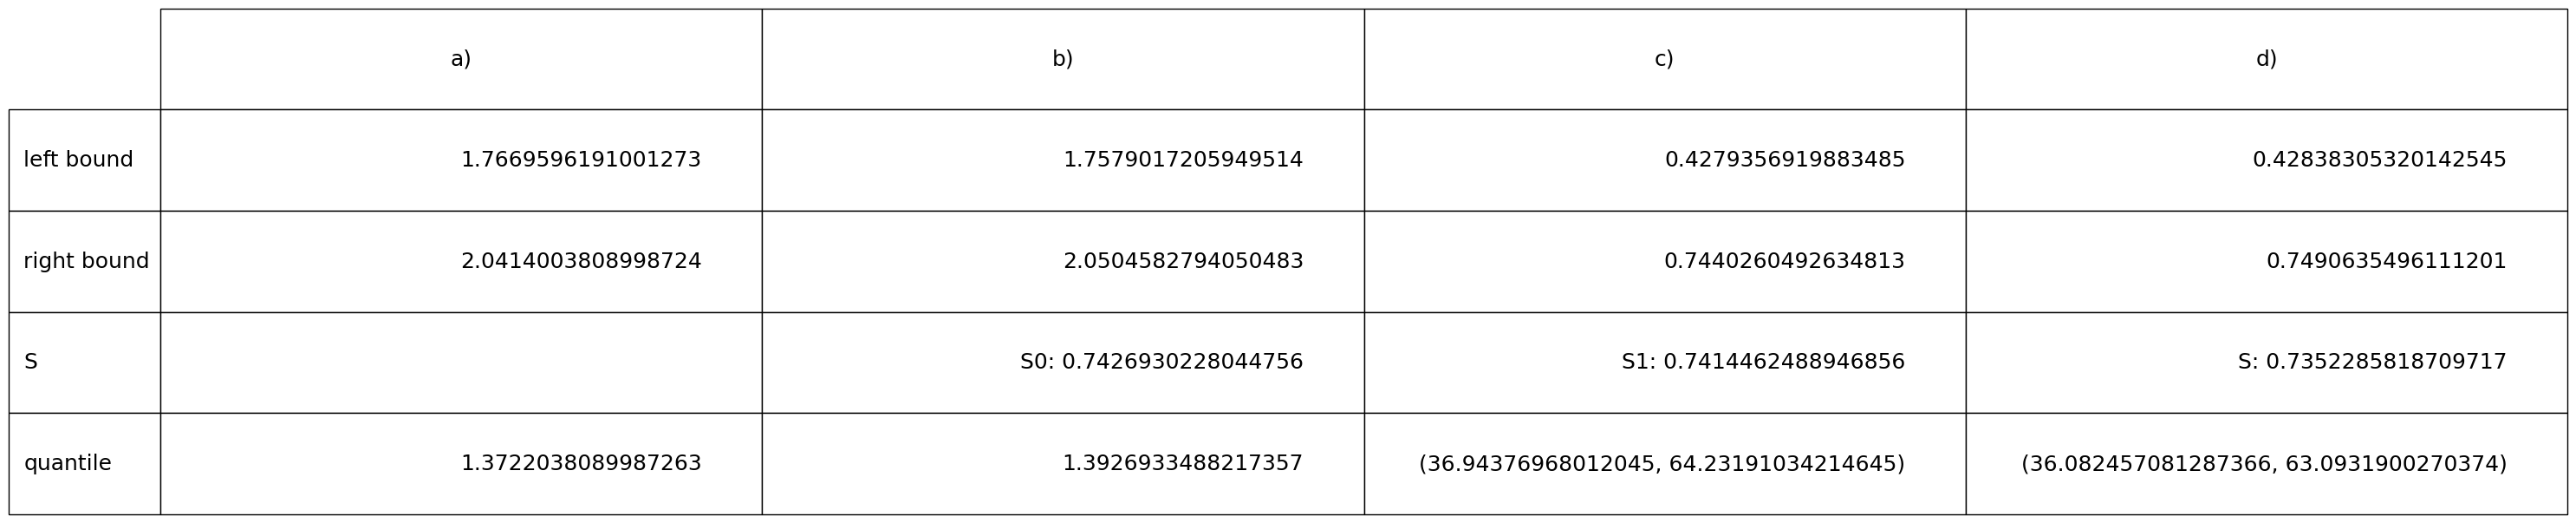

In [25]:
left_bounds = [left_bound_1, left_bound_2, left_bound_3, left_bound_4]
right_bounds = [right_bound_1, right_bound_2, right_bound_3, right_bound_4]
S_arr = [' ', f'S0: {S0}', f'S1: {S1}', f'S: {var_norm_50}']
quantiles = [norm_quantile, student_quantile, (chi2_quantile_1, chi2_quantile_2),(chi2_quantile_3, chi2_quantile_4)]
fig, ax = plt.subplots()
fig.patch.set_visible (False)
ax.axis('off')
ax.axis('tight')
columns = ('a)', 'b)', 'c)', 'd)')
rows = ('left bound', 'right bound', 'S', 'quantile')
cell_text = [left_bounds, right_bounds, S_arr, quantiles]
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      colWidths=[0.20, 0.20, 0.20, 0.20, 0.20, 0.20],
                      loc='center')
the_table.set_fontsize(100)
the_table.scale(7,7)
#display table
plt.show()

In [26]:
n = normal_data_30.size
m = normal_data_20.size
f_quantile_1 = fisher.ppf(epsilon / 2, n - 1, m - 1)
f_quantile_2 = fisher.ppf(1 - epsilon / 2, n - 1, m - 1)
print(f_quantile_1, f_quantile_2)

0.571663026719365 1.8361864887564243


In [27]:
ksi = n * (m-1) * np.square(var_norm_30) / (m * (n-1) * np.square(var_norm_20))
ksi

0.6489976410782682

In [28]:
student_quantile_2 = -1 * t.ppf(epsilon / 2, n + m - 2)
student_quantile_2

1.3931267903729045

In [29]:
eta = (mean_norm_30 - mean_norm_20) / (np.sqrt(1 / n + 1 / m) * np.sqrt((n * np.square(var_norm_30) + m * np.square(var_norm_20)) / (n + m - 2)))
eta

-0.8100429656794943

In [30]:
print(f'S_X = {var_norm_30}')
print(f'S_Y = {var_norm_20}')
print(f'X_mean = {mean_norm_30}')
print(f'Y_mean = {mean_norm_20}')
print(f'd_F = {ksi}')
print(f'd_T = {eta}')
if (f_quantile_1 < ksi and f_quantile_2 > ksi):
    print('В пункте а) не отвергаем гипотезу H0')
else:
    print('В пункте а) отвергаем гипотезу H0')
if (-1 * student_quantile_2 < eta and eta < student_quantile_2):
    print('В пункте б) не отвергаем гипотезу H0')
else:
    print('В пункте б) отвергаем гипотезу H0')

S_X = 0.6650478044638762
S_Y = 0.8183794886848033
X_mean = 1.8344666666666667
Y_mean = 2.00875
d_F = 0.6489976410782682
d_T = -0.8100429656794943
В пункте а) принимаем гипотезу H0
В пункте б) принимаем гипотезу H0


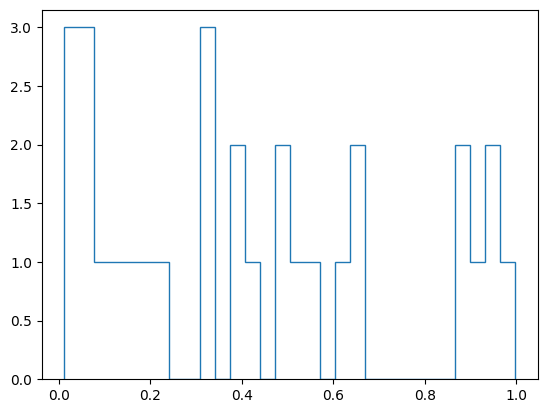

In [45]:
plt.hist(uniform_data_30, histtype='step', cumulative=False, bins=len(uniform_data_30))
plt.show()

11
0.15666666666666665


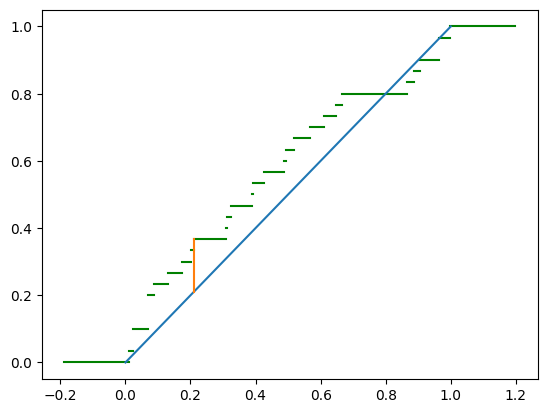

In [ ]:
variational_series = np.array(sorted(uniform_data_30))
Y = [1/uniform_data_30.size * uniform_data_30[uniform_data_30 < i].size for i in variational_series]


first = [(abs(Y[i] - variational_series[i]), i) for i in range(0, variational_series.size)]
second = [(abs(Y[i+1] - variational_series[i]), i) for i in range(0, variational_series.size-1)]
d = max(*first, *second)
d_k = np.sqrt(uniform_data_30.size) * d[0]

if abs(Y[d[1]] - variational_series[d[1]]) > abs(Y[d[1]+1] - variational_series[d[1]]):
    index = d[1]
else:
    index = d[1] + 1

variational_series = np.array([variational_series[0] - 0.2,*variational_series, variational_series[-1] + 0.2])

Y.append(1)
Y.insert(0, 0)
for i in range(0, variational_series.size-1):
    plt.plot([variational_series[i],variational_series[i+1]], [Y[i+1], Y[i+1]], color='green')
plt.plot([0, 1], [0, 1])

plt.plot([variational_series[d[1] + 1], variational_series[d[1] + 1]], [min(Y[index + 1], variational_series[d[1] + 1]), max(Y[index + 1], variational_series[d[1] + 1])])
print(d[1] + 1)
print(max(Y[index + 1], variational_series[d[1] + 1]) - min(Y[index + 1], variational_series[d[1] + 1]))

In [35]:
# test = np.array([3,0,4,3,6,0,3,1])
# variational = np.array(sorted(test))
# Y = [1/test.size * test[test < t].size for t in variational]
# variational = np.array([variational[0] - 1,*variational, variational[-1] + 1])
# Y.append(1)
# Y.insert(0, 0)
# for i in range(0, variational.size-1):
#     plt.plot([variational[i],variational[i+1]], [Y[i+1], Y[i+1]], color='green')

# Y

In [36]:
# first = [(Y[i] - variational_series[i], i) for i in range(0, variational_series.size)]
# second = [(Y[i+1] - variational_series[i], i) for i in range(0, variational_series.size-1)]
# d = max(*first, *second)
# d_k = np.sqrt(uniform_data_30.size) * d[0]

In [37]:
kolm_quantile = kstwobign.ppf(1 - epsilon)
kolm_quantile

1.110064992680849

In [38]:
print(variational_series)
print(Y)

[-0.188  0.012  0.024  0.024  0.068  0.07   0.07   0.087  0.132  0.175
  0.201  0.21   0.308  0.313  0.325  0.39   0.392  0.426  0.486  0.494
  0.519  0.566  0.609  0.646  0.666  0.867  0.886  0.904  0.964  0.965
  0.998  1.198]
[0, 0.0, 0.03333333333333333, 0.03333333333333333, 0.1, 0.13333333333333333, 0.13333333333333333, 0.2, 0.23333333333333334, 0.26666666666666666, 0.3, 0.3333333333333333, 0.36666666666666664, 0.4, 0.43333333333333335, 0.4666666666666667, 0.5, 0.5333333333333333, 0.5666666666666667, 0.6, 0.6333333333333333, 0.6666666666666666, 0.7, 0.7333333333333333, 0.7666666666666666, 0.8, 0.8333333333333334, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667, 1]


In [39]:
freq = {
    (0, 0.2): 0,
    (0.2, 0.4): 0,    
    (0.4, 0.6): 0,
    (0.6, 0.8): 0,
    (0.8, 1): 0
       }

for i in uniform_data_30:
    if 0 <= i and i < 0.2:
        freq[(0, 0.2)] += 1
    elif 0.2 <= i and i < 0.4:
        freq[(0.2,0.4)] += 1
    elif 0.4 <= i and i < 0.6:
        freq[(0.4,0.6)] += 1
    elif 0.6 <= i and i < 0.8:
        freq[(0.6,0.8)] += 1
    elif 0.8 <= i and i <= 1:
        freq[(0.8,1)] += 1

freq

{(0, 0.2): 9, (0.2, 0.4): 7, (0.4, 0.6): 5, (0.6, 0.8): 3, (0.8, 1): 6}

In [40]:
d_x = sum([np.square(freq[i] - uniform_data_30.size * 0.2) / (uniform_data_30.size * 0.2) for i in freq.keys()])

chi2_new_quantile = chi2.ppf(1 - epsilon, 4)
chi2_new_quantile

6.418477247645248

In [41]:
print(f'd_k = {d_k}')
print(f'Индекс элемента: {d[1]}')
print(f'Квантиль распределения Колмогорова уровня 1 - epsilon: {kolm_quantile}')

print(f'd_x = {d_x}')
print(f'Квантиль распределения Хи квадрат с параметром 4 уровня 1 - epsilon: {chi2_new_quantile} ')

print('H0 = {Выборка из U0,1}')
if d_k < kolm_quantile:
    print(f'В пункте а) не отвергается гипотеза H0')
else:
    print(f'В пункте а) отвергается гипотеза H0')

if d_x < chi2_new_quantile:
    print(f'В пункте б) не отвергается гипотеза H0')
else:
    print(f'В пункте б) отвергается гипотеза H0')


d_k = 0.8580986734247602
Индекс элемента: 10
Квантиль распределения Колмогорова уровня 1 - epsilon: 1.110064992680849
d_x = 3.3333333333333335
Квантиль распределения Хи квадрат с параметром 4 уровня 1 - epsilon: 6.418477247645248 
H0 = {Выборка из U0,1}
В пункте а) принимается гипотеза H0
В пункте б) принимается гипотеза H0
